# Tutorial for using Fate2Vec to analyze mouse embryo bulk lineage tracing data

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import Fate2Vec.tl.model as fe
from pkg_resources import resource_filename

## 1. Load dataset

In [2]:
data = pd.read_csv('/data/jiangjunyao/polyATAC/other study validation/homing/embryo3.csv',index_col=0).T
data

,DZ_rep1,DZ_rep2,Heart_rep1,Heart_rep2,JZ_rep1,JZ_rep2,Limb_rep1,Limb_rep2,ParEndo_rep1,ParEndo_rep2,VisEndoqp_rep1,VisEndoqp_rep2
CACAACGCCC-par01,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00
ID:CACAACGCCC-mutSP01:GAAACACCGTCCTGTTAGAGCTAGAAATAGCAAGTTAACCTAAGGCTAGT,59.91,34.38,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00
ID:CACAACGCCC-mutSP02:GAAACACCGGTTTGAACTAGAAATAGCAAGTTAACCTAAGGCTAGTCCGT,21.42,17.01,0.0,0.0,0.00,0.00,0.0,1.17,0.0,0.0,12.95,13.40
ID:CACAACGCCC-mutSP03:GAAACACCGGTTTGAACTGTGTCTGCCTGCATTCAGGTGTGTGCACAGGA,18.67,44.87,0.0,0.0,6.65,19.57,0.0,0.00,0.0,0.0,0.00,0.00
ID:CACAACGCCC-mutSP04:GAAACACCGTGTGGGGTTAGAGCTAGAAATAGCAAGTTAACCTAAGGCTA,0.00,3.74,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,21.81,23.26
...,...,...,...,...,...,...,...,...,...,...,...,...
ID:ACATTCGGTT-mutSP2:GAAACACCGGTCGATTCATATCGAAACCTTCGCTAGAAATAGCAAGTTAA,0.00,0.00,0.0,0.0,0.00,1.75,0.0,0.00,0.0,0.0,0.00,0.00
ID:ACATTCGGTT-mutSP3:GAAACACCGGTCGATTCATATCGAAACCTTCCCGTGACAAGTGGGGTTAG,0.00,0.00,0.0,0.0,0.00,0.00,0.0,1.08,0.0,0.0,0.00,0.00
ID:ACATTCGGTT-mutSP4:GAAACACCGGTCGATTCATATCGAAACCTTCCCGTGAGTGGGGTTAGAGC,0.00,0.00,0.0,0.0,0.00,0.00,0.0,1.08,0.0,0.0,0.00,0.00
AGCACTGTAC-par1,100.00,100.00,100.0,100.0,97.67,100.00,100.0,100.00,100.0,100.0,100.00,100.00


## 2. Generate clone embedding based on skipgram method.

### Some key parameters (if you dont understand word2vec model, just use default)
'clone_size_thr': clone size threshold to filter clones (Small clone size clones are too sparse, thus contaminating model training. Additionally, these small clones generally have restricted fates, so you can manually define their fates) 

'cor_thr': spearman correlation threshold to tokenize clones 

'dims': output dimensions for clone embedding 

'window': word2vec window size


In [3]:
clone_embed = fe.Fate2Vec(data,ncores=25)
clone_embed.embed(clone_size_thr=0.5,cor_thr=0.6,dims=5,window=5,umap_min_dist=1,tokenize_method='spearman')

Potential Multilineage clone number: 40


## 3. Unsupervise clustering to identify clone fate bias based on clone embedding

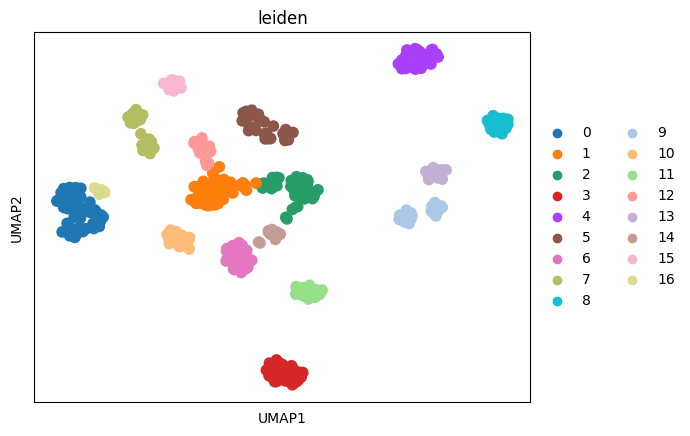

In [4]:
sc.tl.leiden(clone_embed.adata,resolution=0.8)
sc.pl.umap(clone_embed.adata,color='leiden')

## 4. Visualize clone contribution for each cell type

### There two methods to normalize contribution: 'ratio' and 'log10'. For single-cell lineage tracing data, we recommend 'ratio'. For bulk lineage tracing data, we recommed 'log10'

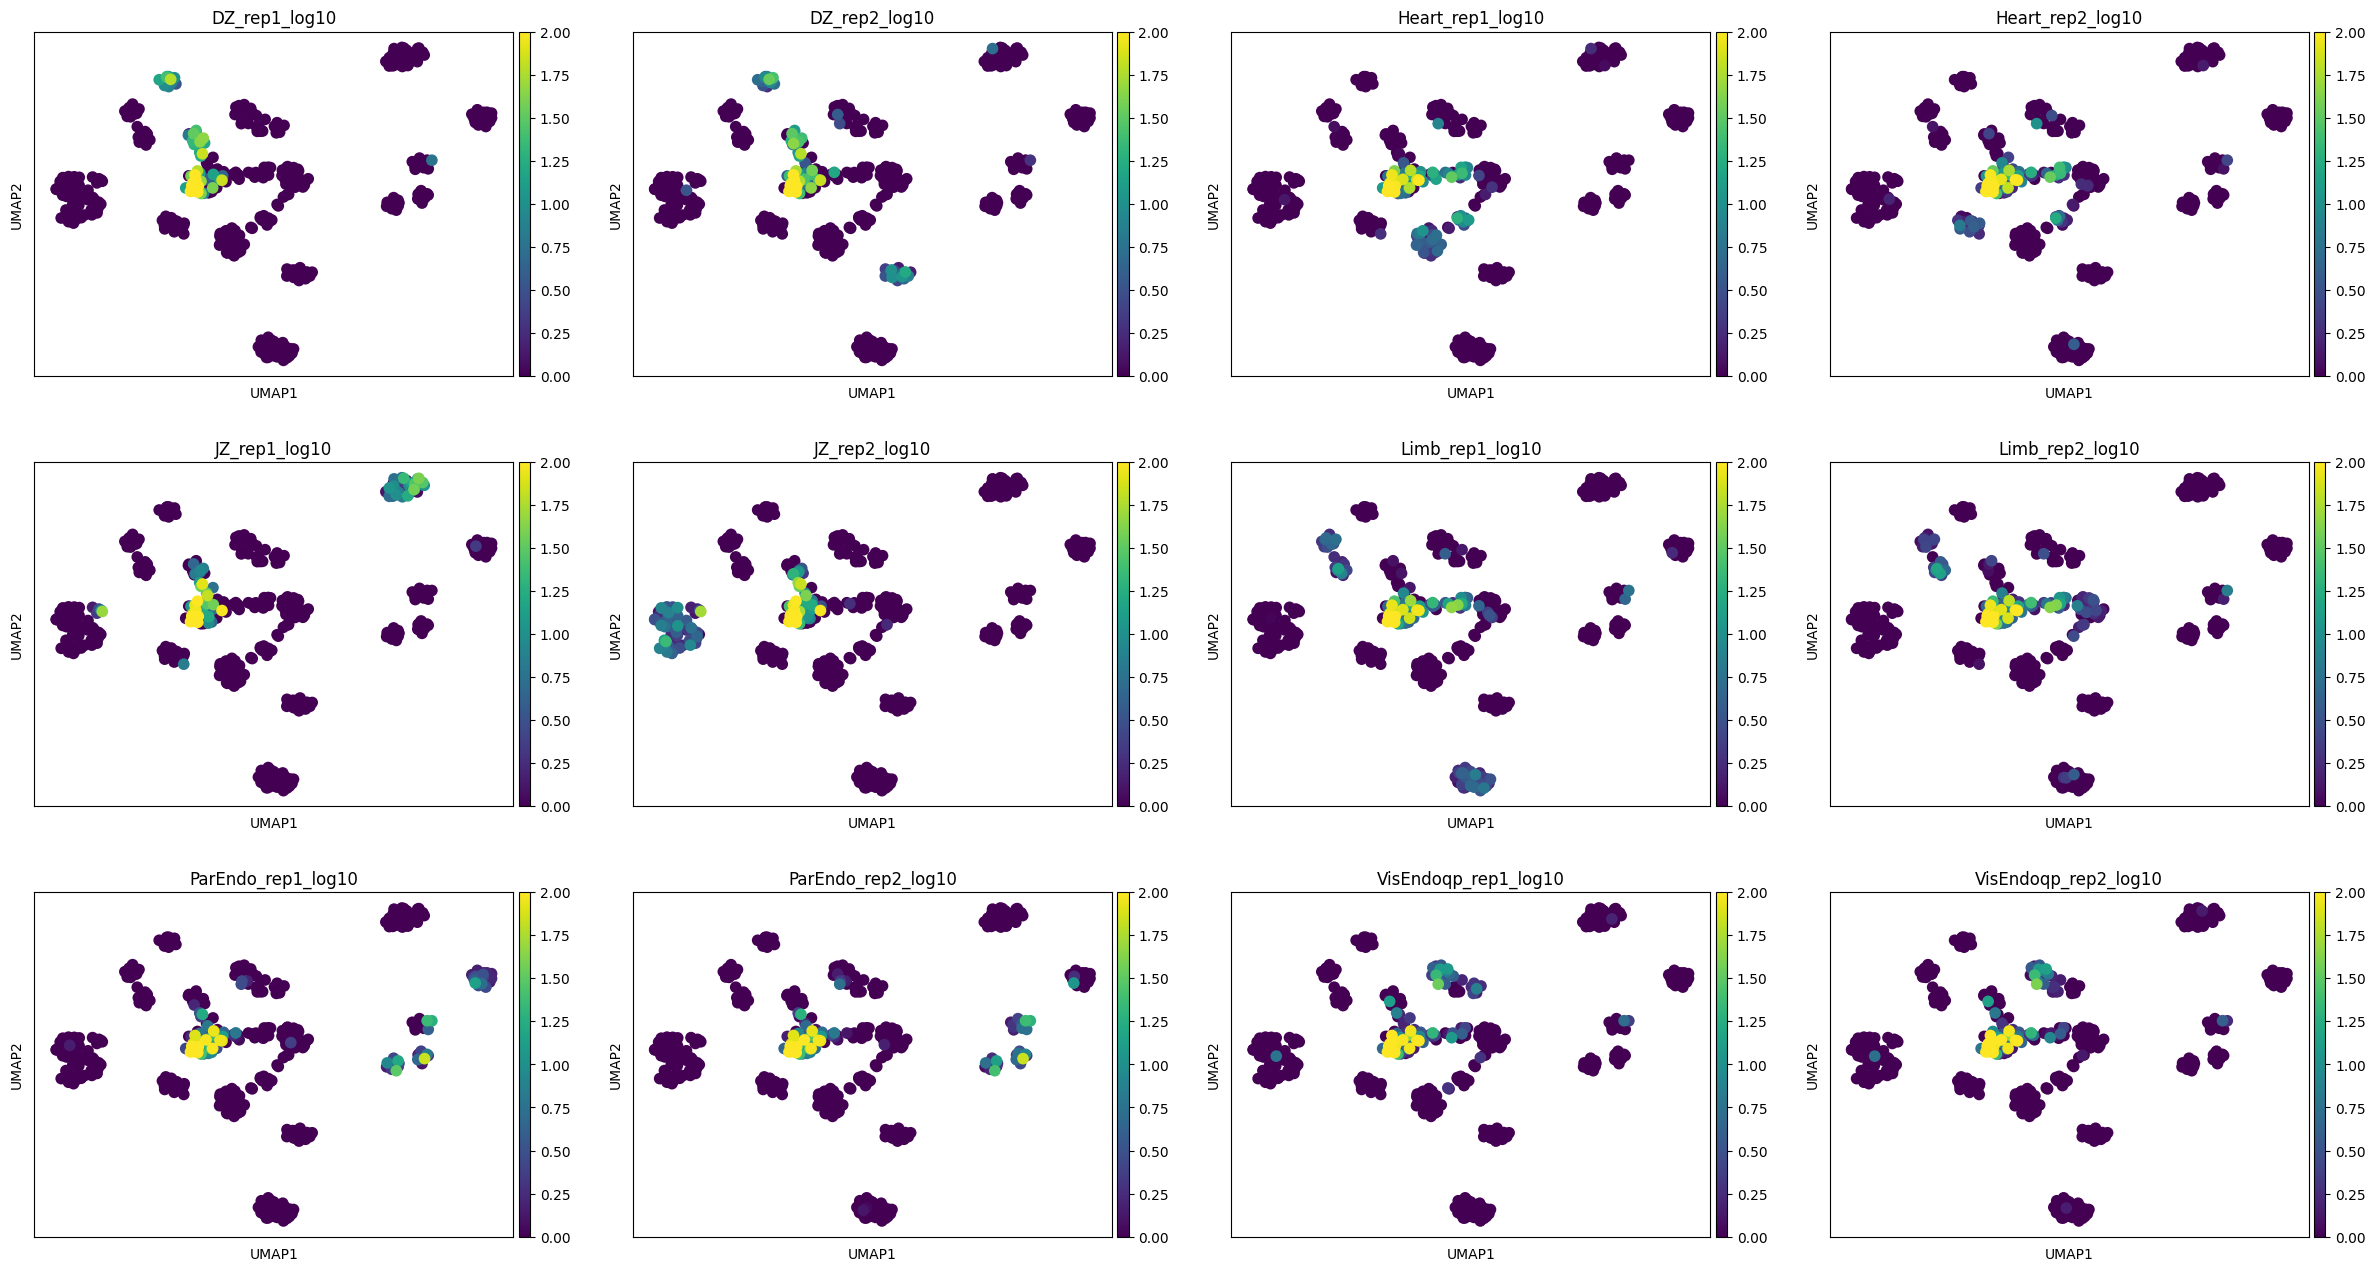

In [5]:
clone_embed.add_clone_contribution(normalize_method='log10')
clone_embed.plot_clone_contribution(normalize_method='log10')

## 5. Visualize clone contribution in each cluster

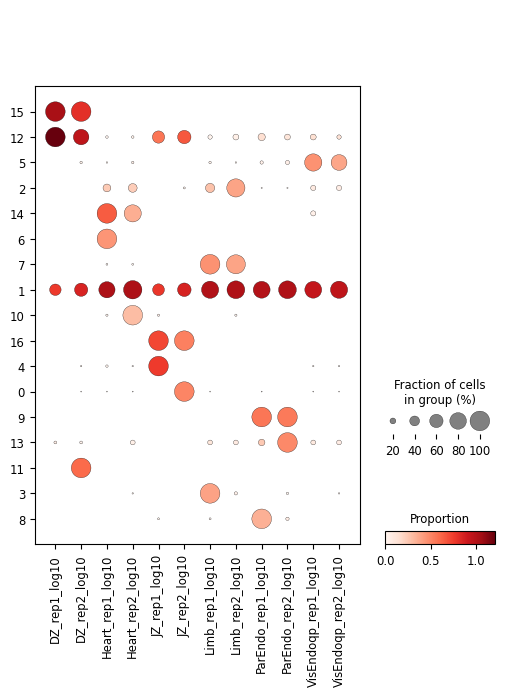

In [6]:
sc.pl.dotplot(clone_embed.adata, var_names=clone_embed.celltype_index, groupby='leiden', colorbar_title='Proportion', dendrogram=False)

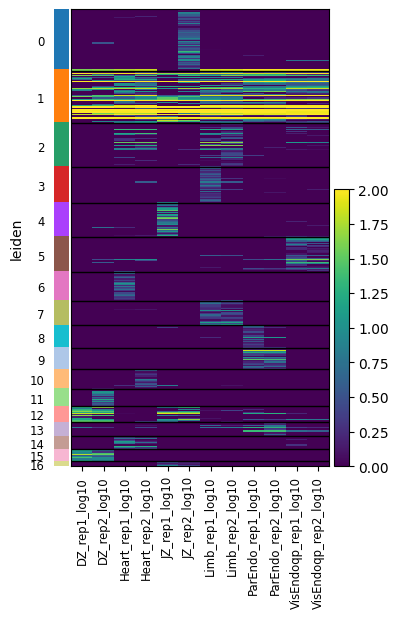

In [7]:
sc.pl.heatmap(clone_embed.adata, var_names=clone_embed.celltype_index, groupby='leiden')

## 6. Construct clone-level lineage tree based on clone embedding

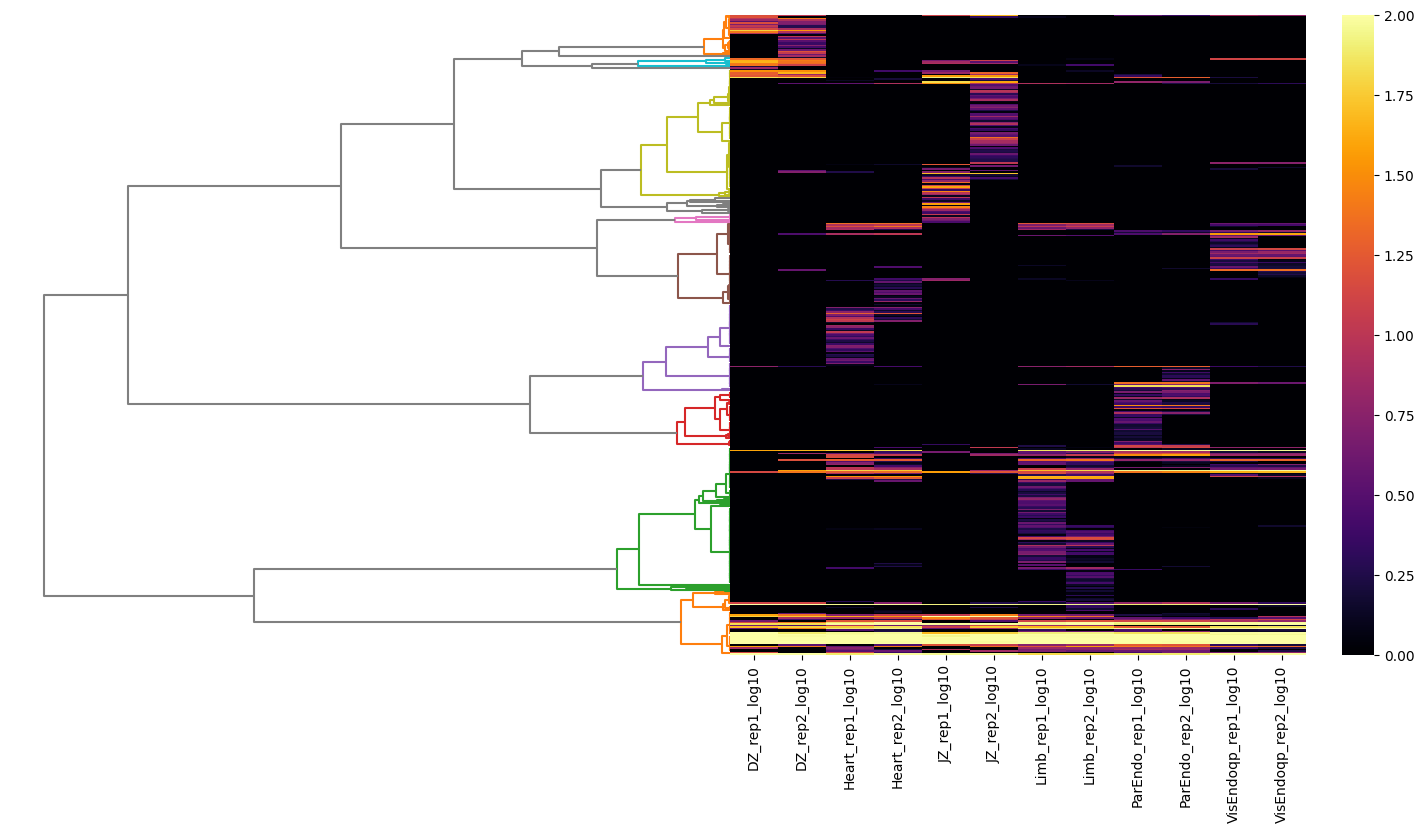

In [8]:
clone_embed.plot_dendrogram(tree_color_threshold=0.1)